# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> In this notebook, we'll be exploring real trip data from Ford GoBike, a public bicycle sharing ("bike share") system in the San Francisco Bay Area, California.

Ford GoBike officially launched on June 28, 2017, and we'll be looking at a full year's worth of trip data starting from that date, all the way through the end of March 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Working with Ford dataset that comes from Ford bike-share program. This data provides a lot of information about the people renting the bike and the routes
After reviewing the data, it is evident that the Ford GoBike is focused in the bay area with many people already subscribed to this service. There are others who would like to try this out for once before availing the service.

In a crowded area like Bay Area, people often use such bike services to commute short distances within the city on a regular basis.

Hence, to understand the true use of such service, it is very important to evaluate some basic questions
When is the service often used? (weekdays vs. weekends)
What is the average ride across different cities? What is the average duration of each ride?
What are the characteristics of Customers vs. Subscribers?
Which are the famous starting and destination station?
What time of the day do users use this service?

# we can download the CSVs for January 2018 through March 2020 from the Ford GoBike website: https://s3.amazonaws.com/fordgobike-data/index.html. This will allow us to analyze trip data for the first full year of Ford GoBike's history.

In [2]:
#loading the dataset
df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv')
df_201801 = pd.read_csv('201801-fordgobike-tripdata.csv')
df_201802 = pd.read_csv('201802-fordgobike-tripdata.csv')
df_201803 = pd.read_csv('201803-fordgobike-tripdata.csv')
df_201804 = pd.read_csv('201804-fordgobike-tripdata.csv')
df_201805 = pd.read_csv('201805-fordgobike-tripdata.csv')
df_201806 = pd.read_csv('201806-fordgobike-tripdata.csv')
df_201807 = pd.read_csv('201807-fordgobike-tripdata.csv')
df_201808 = pd.read_csv('201808-fordgobike-tripdata.csv')
df_201809 = pd.read_csv('201809-fordgobike-tripdata.csv')
df_201810 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_201811 = pd.read_csv('201811-fordgobike-tripdata.csv')
df_201812 = pd.read_csv('201812-fordgobike-tripdata.csv')
df_201901 = pd.read_csv('201901-fordgobike-tripdata.csv')
df_201902 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_201903 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_201904 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_201905 = pd.read_csv('201905-baywheels-tripdata.csv')
df_201906 = pd.read_csv('201906-baywheels-tripdata.csv')
df_201907 = pd.read_csv('201907-baywheels-tripdata.csv')
df_201908 = pd.read_csv('201908-baywheels-tripdata.csv')
df_201909 = pd.read_csv('201909-baywheels-tripdata.csv')
df_201910 = pd.read_csv('201910-baywheels-tripdata.csv')
df_201911 = pd.read_csv('201911-baywheels-tripdata.csv')
df_201912 = pd.read_csv('201912-baywheels-tripdata.csv')
df_202001 = pd.read_csv('202001-baywheels-tripdata.csv')
df_202002 = pd.read_csv('202002-baywheels-tripdata.csv')
df_202003 = pd.read_csv('202003-baywheels-tripdata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create list of all loaded dataframes
frames = [df_2017, df_201801, df_201802, df_201803, df_201804, df_201805, df_201806,
         df_201807, df_201808, df_201809, df_201810, df_201811, df_201812,
         df_201901, df_201902, df_201903, df_201904, df_201905, df_201906,
         df_201907, df_201908, df_201909, df_201910, df_201911, df_201912,
         df_202001, df_202002, df_202003]

# Inspect shape and time period for all dataframes
for x in frames:
    print(x.shape, x.start_time.min(), x.start_time.max())

(519700, 13) 2017-06-28 09:47:36.3470 2017-12-31 23:59:01.2610
(94802, 14) 2018-01-01 00:01:53.8470 2018-01-31 23:53:53.6320
(106718, 14) 2018-02-01 00:00:05.0360 2018-02-28 23:59:47.0970
(111382, 14) 2018-03-01 00:13:31.0810 2018-03-31 23:58:07.8050
(131169, 14) 2018-04-01 00:00:08.1630 2018-04-30 23:58:45.1810
(179125, 14) 2018-05-01 00:02:01.8520 2018-05-31 23:55:22.3670
(195968, 14) 2018-06-01 00:02:28.3230 2018-06-30 23:58:48.2930
(199222, 14) 2018-07-01 00:00:41.6330 2018-07-31 23:57:19.3020
(192162, 14) 2018-08-01 00:00:01.6590 2018-08-31 23:59:28.8740
(186217, 14) 2018-09-01 00:00:11.8510 2018-09-30 23:59:12.2940
(201458, 14) 2018-10-01 00:00:40.4620 2018-10-31 23:58:54.3210
(134135, 14) 2018-11-01 00:01:22.2870 2018-11-30 23:58:26.4310
(131363, 14) 2018-12-01 00:01:49.6930 2018-12-31 23:59:12.0970
(192082, 14) 2019-01-01 00:07:10.5760 2019-01-31 23:59:47.5680
(183412, 14) 2019-02-01 00:00:20.6360 2019-02-28 23:59:18.5480
(256299, 14) 2019-03-01 00:00:20.6750 2019-03-31 23:59:4

Here we inspected each df from the table, it is seen that few table does not have 'rental access method' column well that really doesnt affects our data set as it is ~90%Na values

In [4]:
# Print the name of the last column in each loaded dataframe
for x in frames:
    print(x.columns[-1])

user_type
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
rental_access_method
rental_access_method
bike_share_for_all_trip
bike_share_for_all_trip
bike_share_for_all_trip
rental_access_method
rental_access_method
rental_access_method
rental_access_method
rental_access_method


In [5]:
df_201911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 15 columns):
duration_sec               185496 non-null int64
start_time                 185496 non-null object
end_time                   185496 non-null object
start_station_id           184573 non-null float64
start_station_name         184574 non-null object
start_station_latitude     185496 non-null float64
start_station_longitude    185496 non-null float64
end_station_id             184524 non-null float64
end_station_name           184524 non-null object
end_station_latitude       185496 non-null float64
end_station_longitude      185496 non-null float64
bike_id                    185496 non-null int64
user_type                  185496 non-null object
bike_share_for_all_trip    184086 non-null object
rental_access_method       1410 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 21.2+ MB


In [5]:

# Calculate sum of dataframe rows, to later verify that they were combined correctly
#row_count = 0

#for x in frames:
    #row_count += x.shape[0]

#row_count
#combining the frames
df = pd.concat(frames, ignore_index=True)

# Check that combined row count is the same as above, and that time period is correct
df.shape, df.start_time.min(), df.start_time.max()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


((5795411, 15), '2017-06-28 09:47:36.3470', '2020-04-01 23:59:54')

Combined the frames of data all together in one frame as from 2017 to 2020

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


None

In [7]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


Inspecting Na values from the columns

In [8]:

#checking null values
df.isna().sum()

bike_id                          0
bike_share_for_all_trip    1667966
duration_sec                     0
end_station_id              580455
end_station_latitude             0
end_station_longitude            0
end_station_name            578629
end_time                         0
rental_access_method       5056715
start_station_id            578807
start_station_latitude           0
start_station_longitude          0
start_station_name          576973
start_time                       0
user_type                        0
dtype: int64

rental_access_method have many Nan values i.e 87% 
bike_share_for_all_trip values are only present in 1667966 i.e 28% of the data

In [9]:
# Create a copy that we can clean without modifying the original data.
df_clean = df.copy()

In [10]:
# Check for rows where end_date is less than start_date
df_clean[df_clean.end_time < df_clean.start_time]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
167801,2773,NaN,292,119.0,37.761047,-122.432642,18th St at Noe St,2017-11-05 01:04:45.1800,NaN,121.0,37.759210,-122.421339,Mission Playground,2017-11-05 01:59:52.2160,Subscriber
2233338,1497,No,475,37.0,37.785000,-122.395936,2nd St at Folsom St,2018-11-04 01:07:50.6100,NaN,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-11-04 01:59:54.9780,Customer
2233339,417,No,956,149.0,37.831275,-122.285633,Emeryville Town Hall,2018-11-04 01:06:56.7220,NaN,183.0,37.808702,-122.269927,Telegraph Ave at 19th St,2018-11-04 01:51:00.3960,Subscriber
2233340,2331,No,878,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-11-04 01:02:58.8820,NaN,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2018-11-04 01:48:20.0090,Subscriber
2233341,2136,No,226,61.0,37.776513,-122.411306,Howard St at 8th St,2018-11-04 01:02:48.8040,NaN,41.0,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-11-04 01:59:01.9060,Subscriber
2233342,3144,No,586,95.0,37.766219,-122.431060,Sanchez St at 15th St,2018-11-04 01:02:27.1560,NaN,375.0,37.774836,-122.446546,Grove St at Masonic Ave,2018-11-04 01:52:40.4940,Subscriber
2233343,2487,No,170,134.0,37.752428,-122.420628,Valencia St at 24th St,2018-11-04 01:01:38.2150,NaN,132.0,37.751819,-122.426614,24th St at Chattanooga St,2018-11-04 01:58:47.7450,Subscriber
4725532,12293,No,1720,356.0,37.769188,-122.422285,Valencia St at Clinton Park,2019-11-03 01:27:49.6710,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2019-11-03 01:59:09.3030,Customer
4725547,10968,No,1121,300.0,37.317298,-121.884995,Palm St at Willow St,2019-11-03 01:18:19.0340,NaN,294.0,37.327581,-121.884559,Pierce Ave at Market St,2019-11-03 01:59:37.7220,Customer
4725555,9973,No,643,130.0,37.757704,-122.391885,22nd St Caltrain Station,2019-11-03 01:09:56.7150,NaN,139.0,37.751017,-122.411901,Garfield Square (25th St at Harrison St),2019-11-03 01:59:13.1550,Customer


In [11]:
 #Drop rows where end_time is not greater than start_time
df_clean = df_clean[df_clean.end_time > df_clean.start_time]

In [12]:
# Change `start_time` and `end_time` data type from string to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])


In [13]:
# Check that changes were successful
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795393 entries, 0 to 5795410
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 707.4+ MB


Add new columns
Here we derive a few new columns for our analysis later

In [14]:
# Create duration_min column for duration in minutes instead of seconds
df_clean['duration_min'] = (df_clean.end_time - df_clean.start_time).astype('timedelta64[m]').astype(int)

# Create yyyy_mm column
df_clean['yyyy_mm'] = df_clean.start_time.astype('<M8[M]')

# Create start_hour column
df_clean['start_hour'] = df_clean.start_time.dt.hour

# Create start_dow column
df_clean['start_dow'] = df_clean.start_time.dt.day_name()

# Create start_month column
df_clean['month'] = df_clean.start_time.dt.month




In [15]:
# Verify changes
display(df_clean.head())
display(df_clean.info())

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_min,yyyy_mm,start_hour,start_dow,month
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,1335,2017-12-01,16,Sunday,12
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,1313,2017-12-01,15,Sunday,12
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,762,2017-12-01,22,Sunday,12
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,1036,2017-12-01,17,Sunday,12
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,726,2017-12-01,14,Sunday,12


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795393 entries, 0 to 5795410
Data columns (total 20 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
duration_min               int32
yyyy_mm                    datetime64[ns]
start_hour                 int64
start_dow                  object
month                      int64
dtypes: datetime64[ns](3), float64(6), int32(1), int64(4), object(6)
memory usage: 906.4+ MB


None

### What is the structure of your dataset?

> The data usually consisting of  5795410 rows that took place between 2017 to 2020-03
Looks good, where each dataframe is consisting similar columns while few of the dataframe does have a extra columns such as rental_access_method and bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> The user information such as the start time , end time, trip duration, customer type are very important for further analysis 
By finding patterns in overall GoBike usage and identifying differences between members ("Subscribers") and more casual users ("Customers"), we can get a better sense of how (and to whom) we should market Ford GoBike in order to acquire more new customers and turn more existing customers into subscribers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From the timestamp data for each ride, we are able to derive new columns for calendar date (YYYY-MM-DD), hour of the day (0-23), and day of the week.

>We can convert duration_sec to duration in minutes, as I believe those are more intuitive units when talking about bicycle rides and riders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

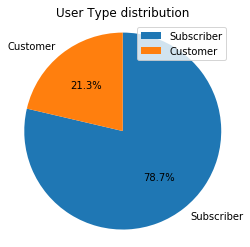

In [20]:

# Pie chart for user_type
type_counts = df_clean.user_type.value_counts()

plt.pie(type_counts, 
        labels = type_counts.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)

plt.legend()
plt.title("User Type distribution")
plt.axis('square');

Subscribers are more than the Customers

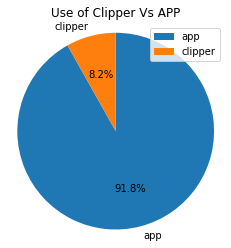

In [19]:

# Pie chart for user_type
type_counts = df_clean.rental_access_method.value_counts()

plt.pie(type_counts, 
        labels = type_counts.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)
plt.title("Use of Clipper Vs APP")
plt.legend()
plt.axis('square');

The customers using App is more as compared to a clippper card

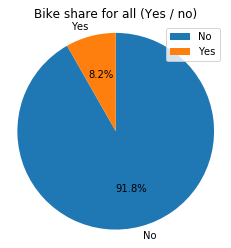

In [21]:

# Pie chart for user_type
type_counts = df_clean.bike_share_for_all_trip.value_counts()

plt.pie(type_counts, 
        labels = type_counts.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)

plt.title("Bike share for all (Yes / no)")

plt.legend()
plt.axis('square');

91.88% users does not share for trips

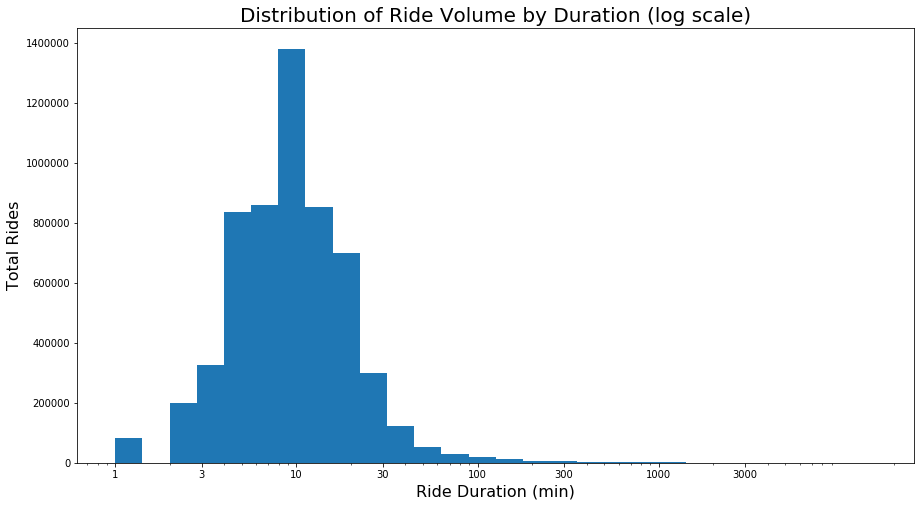

In [23]:
plt.figure(figsize=[15,8])
bin_edges = 10 ** np.arange(0, np.log10(df_clean.duration_min.max())+0.15, 0.15)
plt.hist(df_clean.duration_min, bins = bin_edges)
plt.xscale('log')

ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks, ticks)
plt.xlabel('Ride Duration (min)', fontsize=16)
plt.ylabel('Total Rides', fontsize=16)
plt.title('Distribution of Ride Volume by Duration (log scale)', fontsize=20);


In [24]:

# Percent of all rides that are 45 minutes or less
df_clean[df_clean.duration_min <= 45].count().duration_min * 1.0 / len(df_clean.duration_min)

0.9773306141619731

97% of all rides are less than 45min
The distribution for ride duration is highly skewed to the right. When plotted on a log-scale, ride duration follows an approximately log-normal distribution, with a median duration of 9 minutes and most rides taking between 3 and 30 minutes.

97% of all rides last 45 minutes or less.

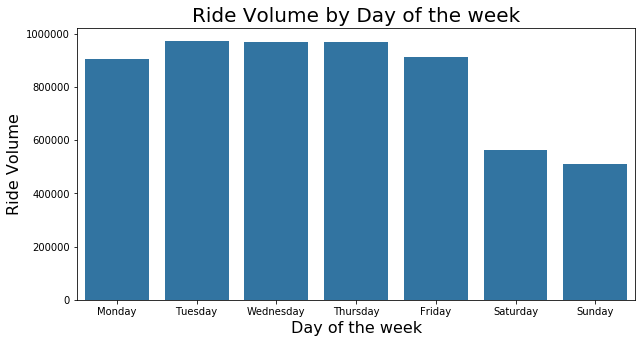

In [25]:
#On which day the trips are most? 

# The start_dow column is currently a string data type. Need to change to category.
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(categories=dow_order, ordered=True)
df_clean['start_dow'] = df_clean['start_dow'].astype(ordered_cat)

plt.figure(figsize=[10,5])
sb.countplot(df_clean.start_dow, color = sb.color_palette()[0])
plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('Ride Volume', fontsize=16)
plt.title('Ride Volume by Day of the week', fontsize=20);

Mostly maximum no of rides were taken on Thursday and Friday and very less no of trips taken from Saturday and Sunday

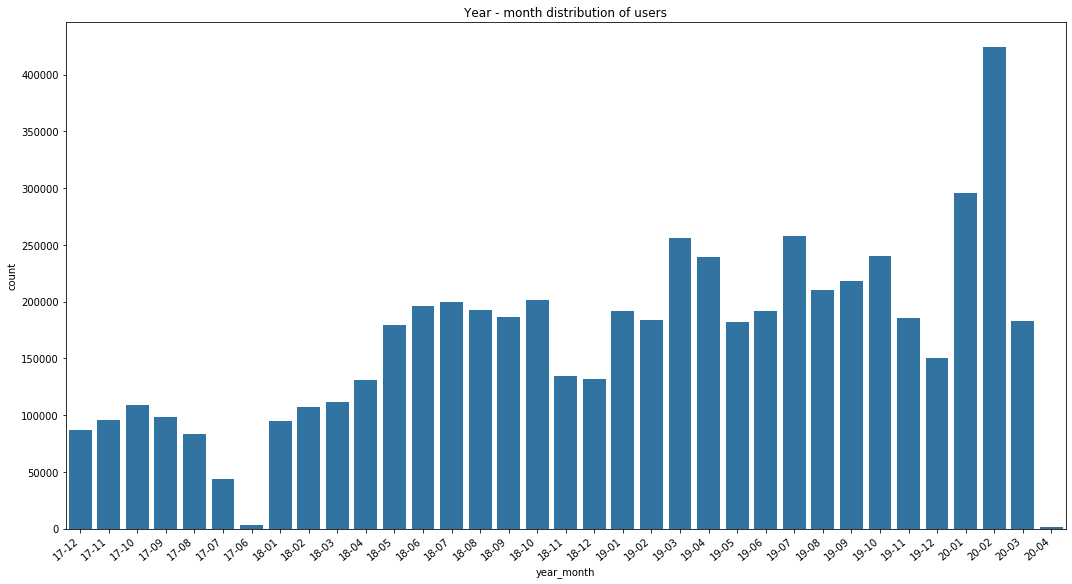

In [26]:
df_clean['year_month']=df_clean['start_time'].dt.strftime('%y'+'-'+'%m')
# Total rides by month
plt.figure(figsize=[15,8])
ax = sb.countplot(data = df_clean, 
             x = 'year_month',
             color = sb.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Year - month distribution of users")
plt.show()

From the chart we can see that there is an interesting spike is present in the riders count Feb2020 while there is a huge dip in the count in June2017 since data is missing.

Text(0.5, 1.0, 'Month - count distribution')

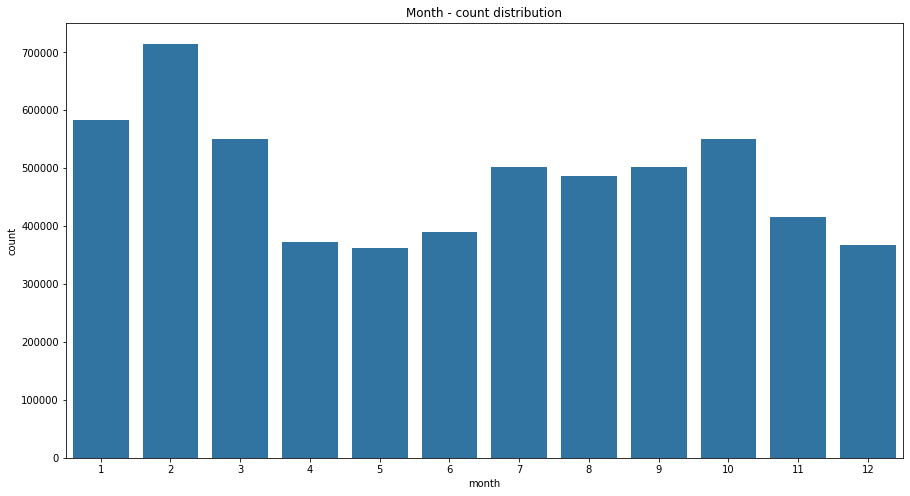

In [28]:
# Total rides by month
plt.figure(figsize=[15,8])
ax = sb.countplot(data = df_clean, 
             x = 'month',
             color = sb.color_palette()[0]);
plt.title("Month - count distribution")

It is clear from the the chart that the count of the bike rides sees an demand increase in the month of February, where the count gets gets decreased by almost 40% in the month April-May from rest of the year

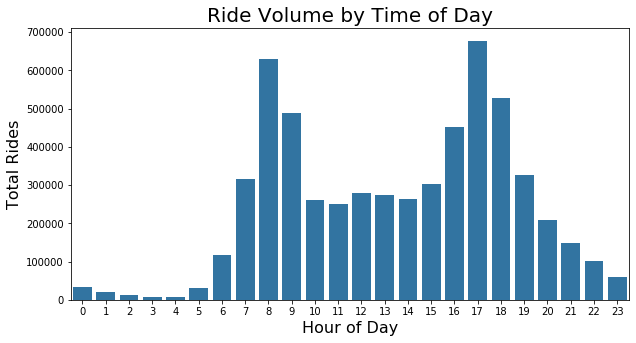

In [30]:
# Total rides by start_hour
plt.figure(figsize=[10,5])
sb.countplot(df_clean.start_hour, color = sb.color_palette()[0])
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('Total Rides', fontsize=16)
plt.title('Ride Volume by Time of Day', fontsize=20);

Most of the start hour is usually from 8 and from 17

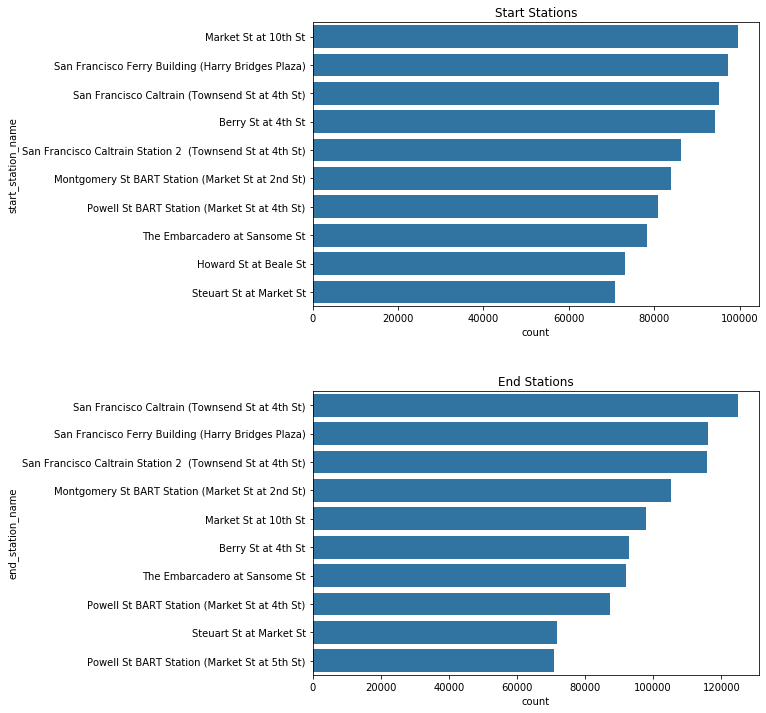

In [31]:
# Top 10 most popular start and end stations

plt.figure(figsize=[8,12])
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
sb.countplot(data = df_clean, 
             y = 'start_station_name', 
             order = df_clean.start_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('Start Stations')

plt.subplot(2, 1, 2)
sb.countplot(data = df_clean, 
             y = 'end_station_name', 
             order = df_clean.end_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('End Stations');

Most popluar start station is Market Street 10 st. 
Most popular end station is San Francisco Caltrain
There is quite a bit of overlap between the two lists. Later on, we'll be looking at how the most popular stations differ based on user type (Subscribers vs Customers)..

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of ride distribution (in minutes) was extremely skewed to the right. After a log transformation, the data looked roughly normal with a mean of 9 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one row in which the ride end time was recorded as having occurred before its start time, which is obviously impossible. I removed that row from the dataset so that plots for ride duration would not display negative value

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Ride Duration by user type

Text(0.5, 1.0, 'Ride Duration by User Type')

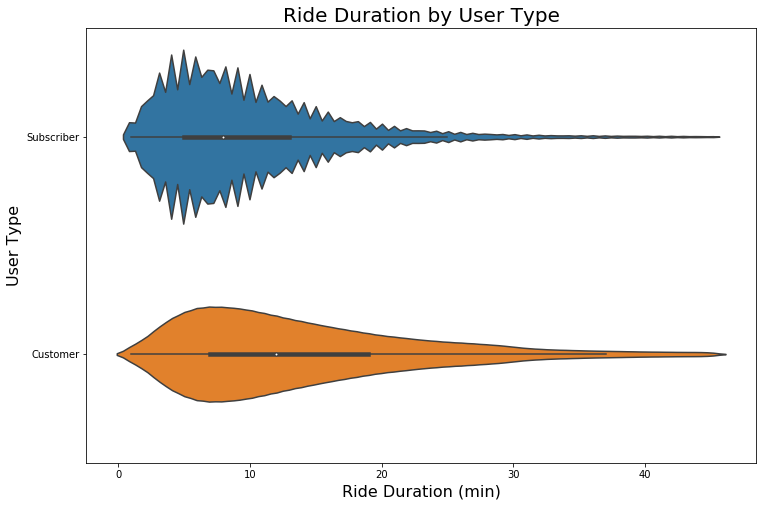

In [34]:
# Violin plot
plt.figure(figsize=[12,8])
sb.violinplot(data = df_clean.query('duration_min <= 45'), y = 'user_type', x = 'duration_min')
plt.xlabel('Ride Duration (min)', fontsize=16)
plt.ylabel('User Type', fontsize=16)
plt.title('Ride Duration by User Type', fontsize=20)


Subscribers tend to take shorter rides than customers. Most subscriber rides are 10 minutes or less,
while the duration of customer rides tends to vary more i.e. has a wider spread.

In [35]:
#temperory df for user type
# dataframe for count of trips
j = df_clean.groupby(['user_type']).size().to_frame('no. of trips')
j

,no. of trips
user_type,
Customer,1236757
Subscriber,4558636


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


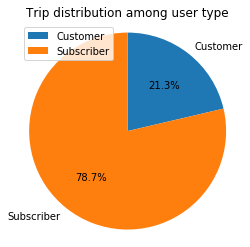

In [36]:
# pie chart for no of trips
plt.pie(j, 
        labels = j.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)
plt.title("Trip distribution among user type")
plt.legend()
plt.axis('square');

Subscribers tend to take more rides than customers. 

Popular Station by user type

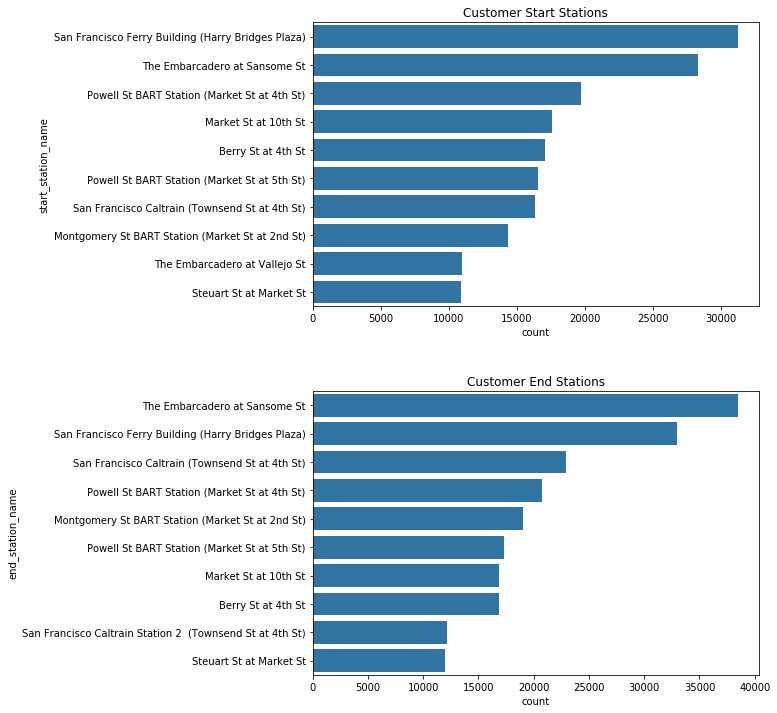

In [37]:
# Most popular start and end stations for Customers
plt.figure(figsize=[8,12])
plt.subplots_adjust(hspace=0.3)

customers = df_clean.query('user_type == "Customer"')

plt.subplot(2, 1, 1)
sb.countplot(data = customers, 
             y = 'start_station_name', 
             order = customers.start_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('Customer Start Stations')

plt.subplot(2, 1, 2)
sb.countplot(data = customers, 
             y = 'end_station_name', 
             order = customers.end_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('Customer End Stations');

For Customers, the most popular stations are touristy areas such as San Francisco Ferry Building,Embarcadero at Sansome St
, Powell St BART, etc.

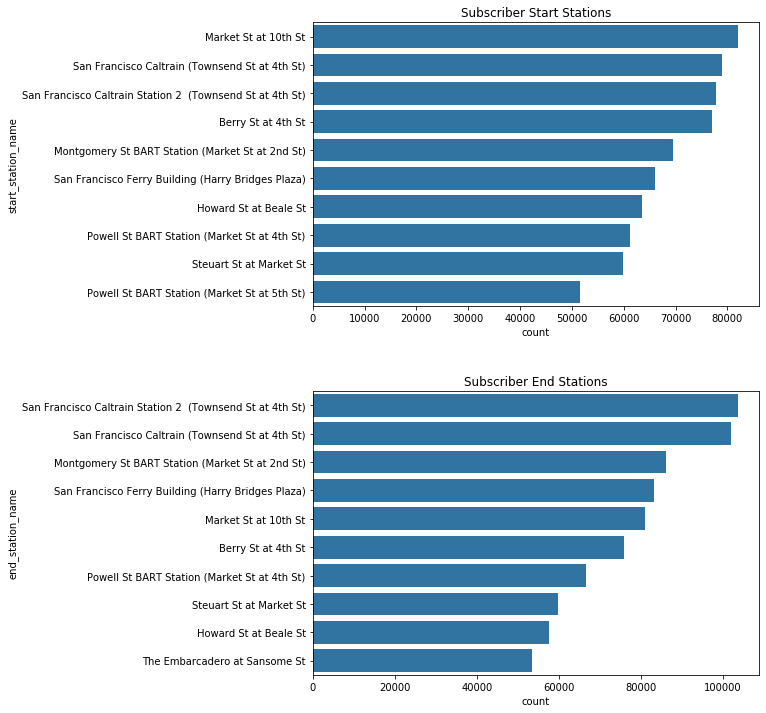

In [38]:
# Most popular start and end stations for Subscribers
plt.figure(figsize=[8,12])
plt.subplots_adjust(hspace=0.3)

subscribers = df_clean.query('user_type == "Subscriber"')

plt.subplot(2, 1, 1)
sb.countplot(data = subscribers, 
             y = 'start_station_name', 
             order = subscribers.start_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('Subscriber Start Stations')

plt.subplot(2, 1, 2)
sb.countplot(data = subscribers, 
             y = 'end_station_name', 
             order = subscribers.end_station_name.value_counts().iloc[:10].index,
             color = sb.color_palette()[0])
plt.title('Subscriber End Stations');

For Subscribers, the top stations are at San Francisco Caltrain (a major commute hub), Markey St at 10th
and other "downtown" areas.

Text(0.5, 1.0, 'Start Hour Vs Duration of ride')

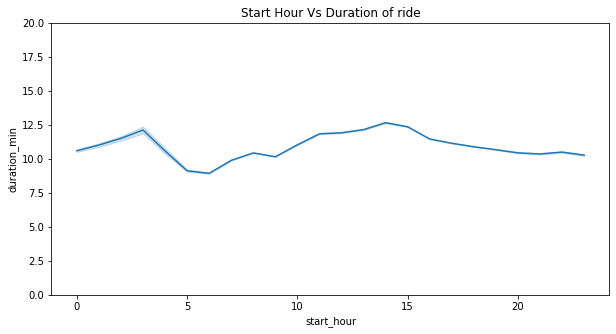

In [39]:
# Duration by start hour
plt.figure(figsize=[10,5])
sb.lineplot(data = df_clean.query('duration_min <= 60'), x = 'start_hour', y = 'duration_min')
plt.ylim(0,20);
plt.title("Start Hour Vs Duration of ride")

As expected duration is still between 8 to 13 min regardless of the time of the day

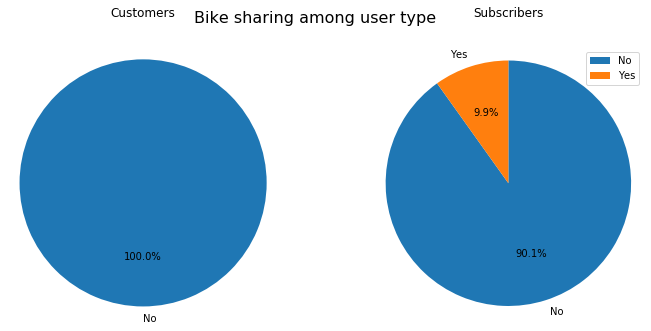

In [51]:

fig = plt.figure(figsize = [12,5])
fig.suptitle("Bike sharing among user type",size = 16)
# Pie chart for customer gender
plt.subplot(1, 2, 1)
gender_customer = df_clean.query('user_type == "Customer"').bike_share_for_all_trip.value_counts()

plt.pie(gender_customer, 
        labels = gender_customer.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)

plt.axis('square')
plt.title('Customers', pad = 30)

# Pie chart for subscriber gender 
plt.subplot(1, 2, 2)
gender_subscriber = df_clean.query('user_type == "Subscriber"').bike_share_for_all_trip.value_counts()

plt.pie(gender_subscriber, 
        labels = gender_subscriber.index,
        autopct='%1.1f%%',
        startangle = 90,
        counterclock = False)

plt.axis('square')
plt.title('Subscribers', pad = 30)
plt.legend()

It is clear from the chart that here we can see that Customers did not share the rides at all, Bike share for all as a part of the scheme to share more no. of rides are appeared to have an affect on the counts

Text(0.5, 1.0, 'duration of rides over day of the week')

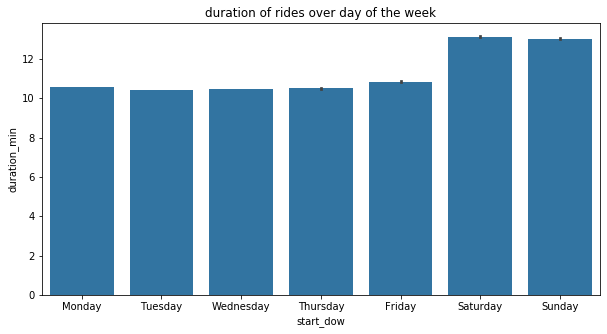

In [49]:
# Duration by day of week
plt.figure(figsize=[10,5])
sb.barplot(data = df_clean.query('duration_min <= 60'), 
           x = 'start_dow', 
           y = 'duration_min',
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           color = sb.color_palette()[0])
plt.title("duration of rides over day of the week")
plt.x_

 As expected the rides duration increases and are relatively more on weekends

Text(0.5, 1.0, 'Ride duration over months')

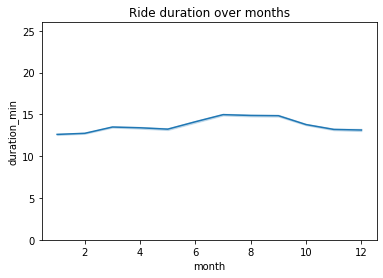

In [52]:
# Duration by start month
sb.lineplot(data = df_clean.query('start_time.dt.month != 2020'), x = 'month', y = 'duration_min', color = sb.color_palette()[0])
plt.ylim(0,26);
plt.title("Ride duration over months")

Average monthly ride duration was consistently around 15 minutes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most notable differences were 1) ride duration by user type, 2) day of week by user type, and 3) time of day by user type.

>Ride duration for subscribers tended to be shorter than that of customers, and with a much narrower spread.

>Ride volume for subscribers is much higher on the weekdays than on the weekends, while ride volume for customers peaks during the weekend.

>The distribution of rides by time of day for subscribers was bimodal, with peaks at 8am and 5pm. The distribution for customers was unimodeal and spread more evenly across daylight hours.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1, 'Correlation plot of variables')

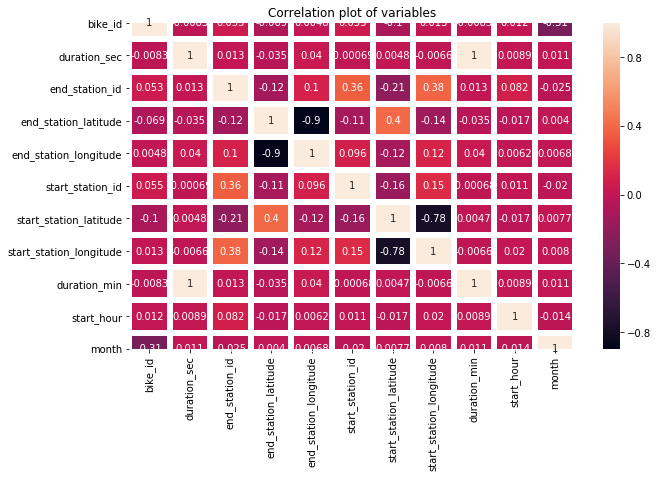

In [60]:
plt.figure(figsize = (10,6))
corr = df_clean.corr()
ax = sb.heatmap(corr , annot = True, linewidth = 5 , cbar = True,)
plt.title("Correlation plot of variables")

Average Ride Duration by Month

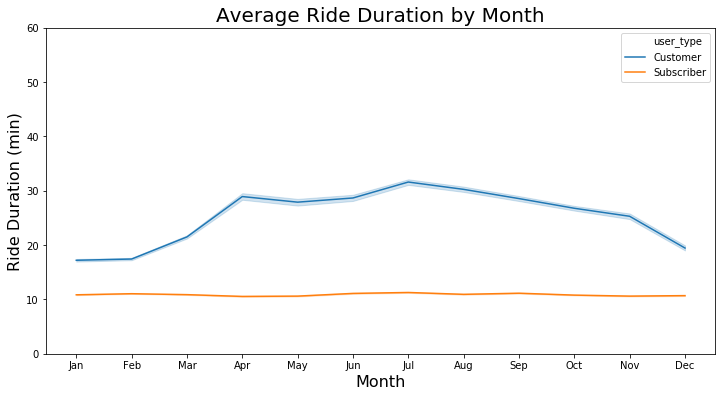

In [61]:

plt.figure(figsize=[12,6])
sb.lineplot(data = df_clean, 
            x = 'month', 
            y = 'duration_min',
            hue = 'user_type')
plt.ylim(0,60)
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=16)
plt.ylabel('Ride Duration (min)', fontsize=16)
plt.title('Average Ride Duration by Month', fontsize=20);

Here we can infer that the subscribers are having pretty constant rides duration throughout the year
while the customers tends to have longer duration of rides

Average ride duration by Start Hour

Text(0.5, 1.0, 'Start hour and duration among user type')

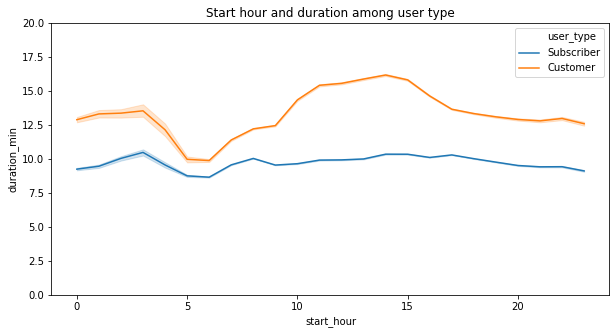

In [62]:
plt.figure(figsize=[10,5])
sb.lineplot(data = df_clean.query('duration_min <= 45'), x = 'start_hour', y = 'duration_min', hue = 'user_type')
plt.ylim(0, 20);
plt.title("Start hour and duration among user type")

Text(0.5, 1.0, 'Day of the week and duration of ride among users')

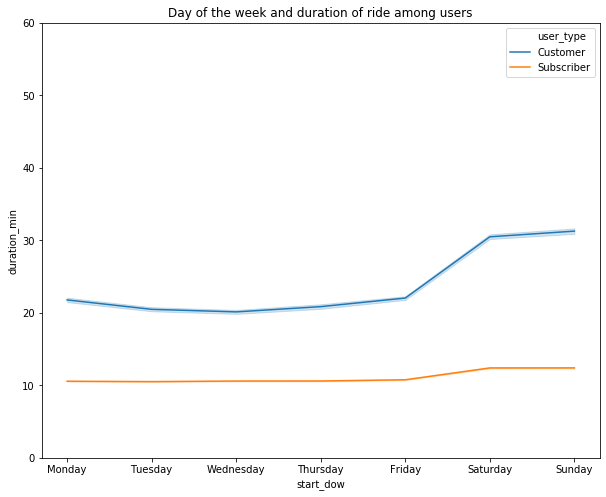

In [63]:

plt.figure(figsize=[10,8])

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(categories=dow_order, ordered=True)
df_clean['start_dow'] = df_clean['start_dow'].astype(ordered_cat)

sb.lineplot(data = df_clean, 
            x = 'start_dow', 
            y = 'duration_min', 
            hue = 'user_type')
plt.ylim(0,60)
plt.title("Day of the week and duration of ride among users")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When looking at ride duration by month and user type, it became clear that there is a dip in the rides as well as ride duration of the bikes in the holiday season of the customers, as ride duration for subscribers was remarkably consistent throughout the year at around 10 minutes.

>Likewise, when looking at ride duration by day of week and by user type, it became clear that the higher ride duration during the weekend was being largely driven by customers

### Were there any interesting or surprising interactions between features?

> It was quite predictable that the behaviour of the the one time customers largely affects the overall count of the rides


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!